# Exploratory data analysis (EDA) of Strava activities
Simple EDA looking into some of my Strava activities.

To get your Strava data, follow this article (bulk export): https://support.strava.com/hc/en-us/articles/216918437-Exporting-your-Data-and-Bulk-Export. 
You get a shitload of files, but for this we only need the activites.csv file and the activites folder. 

Shoutout to @andersle for the gpxplotter library. 

Installation:
```

pip install gpxplotter

```

In [1]:
import pandas as pd
import numpy as np
from gpxplotter import read_gpx_file, create_folium_map, add_segment_to_map
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
from dateutil import parser

Only using relevant colums when loading the dataframe. 

In [2]:
df = pd.read_csv("activities.csv",index_col='Activity ID',usecols=['Activity ID','Activity Date','Activity Name','Activity Type','Elapsed Time','Distance','Filename'])

In [3]:
df.head(5)

,Activity Date,Activity Name,Activity Type,Elapsed Time,Distance,Filename
Activity ID,,,,,,
4129227513,"Sep 29, 2020, 5:09:59 PM",Stokkis,Run,2777,9.14,activities/4129227513.gpx
4141891050,"Oct 2, 2020, 3:51:25 PM",Helg,Run,785,3.06,activities/4141891050.gpx
4205006903,"Oct 17, 2020, 7:38:41 AM",Rolig helgestart,Run,2782,9.13,activities/4205006903.gpx
4247318707,"Oct 26, 2020, 7:10:52 PM",Evening Run,Run,3790,10.25,activities/4247318707.gpx
4290345845,"Nov 5, 2020, 3:49:20 PM",Tungt,Run,3283,9.40,activities/4290345845.gpx


I am mostly insterested in checking my progress round Stokkavannet. Those activites are most likely between 8-10 km, depending on if I run to and from. And they are labeled as activity type run. 

In [4]:
df_stokkis = df.loc[(df["Activity Type"]=="Run") & (df["Distance"]>8) & (df["Distance"]<10)]

Now I have the ...

In [27]:
df_stokkis.head(5)

,Activity Date,Activity Name,Activity Type,Elapsed Time,Distance,Filename
Activity ID,,,,,,
4129227513,"Sep 29, 2020, 5:09:59 PM",Stokkis,Run,2777,9.14,activities/4129227513.gpx
4205006903,"Oct 17, 2020, 7:38:41 AM",Rolig helgestart,Run,2782,9.13,activities/4205006903.gpx
4290345845,"Nov 5, 2020, 3:49:20 PM",Tungt,Run,3283,9.40,activities/4290345845.gpx
4343701048,"Nov 15, 2020, 6:58:25 PM",Kveldsjoggen,Run,3015,9.20,activities/4343701048.gpx
4409499979,"Nov 29, 2020, 7:27:00 PM",Evening Run,Run,2919,9.16,activities/4409499979.gpx


Lets make a progress plot of these activities:

In [8]:
dates = np.array(df_stokkis["Activity Date"].values)
length = np.array(df_stokkis["Distance"].values) #km
time = np.array(df_stokkis["Elapsed Time"].values) #seconds

In [9]:
dates

array(['Sep 29, 2020, 5:09:59 PM', 'Oct 17, 2020, 7:38:41 AM',
       'Nov 5, 2020, 3:49:20 PM', 'Nov 15, 2020, 6:58:25 PM',
       'Nov 29, 2020, 7:27:00 PM', 'Dec 1, 2020, 6:37:39 PM',
       'Dec 26, 2020, 2:33:52 PM', 'Jan 5, 2021, 12:02:43 PM',
       'Feb 28, 2021, 1:19:55 PM', 'Mar 2, 2021, 5:06:22 PM',
       'Mar 8, 2021, 5:33:18 PM', 'Mar 15, 2021, 4:03:57 PM',
       'Mar 20, 2021, 12:19:00 PM', 'Apr 12, 2021, 4:25:08 PM',
       'Apr 16, 2021, 7:11:31 PM', 'Apr 17, 2021, 9:32:46 AM',
       'Apr 23, 2021, 6:25:54 PM', 'Apr 26, 2021, 4:55:28 PM',
       'Apr 28, 2021, 12:21:05 PM', 'May 11, 2021, 4:41:34 PM',
       'May 15, 2021, 5:20:52 PM'], dtype=object)

In [10]:
def convert_to_datetime(stravaTimes):
    """
    stravaTimes is a array on containg elements in string form "Month Day, Year, Clock", e.g.: Sep 29, 2020, 5:09:59 PM or May 11, 2021, 4:41:34 PM
    """
    rundates_datetime = []
    for run in stravaTimes:
        date = run
        dt = parser.parse(date)  
        rundates_datetime.append(dt.date())   
    return rundates_datetime 
datetimes = convert_to_datetime(dates)

In [11]:
datetimes

[datetime.date(2020, 9, 29),
 datetime.date(2020, 10, 17),
 datetime.date(2020, 11, 5),
 datetime.date(2020, 11, 15),
 datetime.date(2020, 11, 29),
 datetime.date(2020, 12, 1),
 datetime.date(2020, 12, 26),
 datetime.date(2021, 1, 5),
 datetime.date(2021, 2, 28),
 datetime.date(2021, 3, 2),
 datetime.date(2021, 3, 8),
 datetime.date(2021, 3, 15),
 datetime.date(2021, 3, 20),
 datetime.date(2021, 4, 12),
 datetime.date(2021, 4, 16),
 datetime.date(2021, 4, 17),
 datetime.date(2021, 4, 23),
 datetime.date(2021, 4, 26),
 datetime.date(2021, 4, 28),
 datetime.date(2021, 5, 11),
 datetime.date(2021, 5, 15)]

In [12]:

km_per_s = length/time
km_per_h = km_per_s * 3600
min_per_km = (time/60)/length

In [13]:
km_per_h

array([11.84875765, 11.81452193, 10.30764545, 10.98507463, 11.29701953,
       11.23613963, 10.68297047, 10.46816598, 10.89236921, 11.62258431,
       11.63076923, 12.21639344,  9.59073359, 11.61710526, 12.0353071 ,
       10.4989719 , 12.14296351,  9.16962306, 12.1575985 , 12.02177858,
       12.18045113])

In [14]:
min_per_km

array([5.06382203, 5.0784958 , 5.82092199, 5.46195652, 5.31113537,
       5.33991228, 5.61641541, 5.73166304, 5.50844347, 5.16236307,
       5.15873016, 4.91143317, 6.25603865, 5.16479783, 4.98533187,
       5.71484528, 4.94113319, 6.54334421, 4.93518519, 4.99094203,
       4.92592593])

In [82]:
days = mdates.drange(datetimes[0],datetimes[:-1],dt.timedelta(days=1))

TypeError: only size-1 arrays can be converted to Python scalars

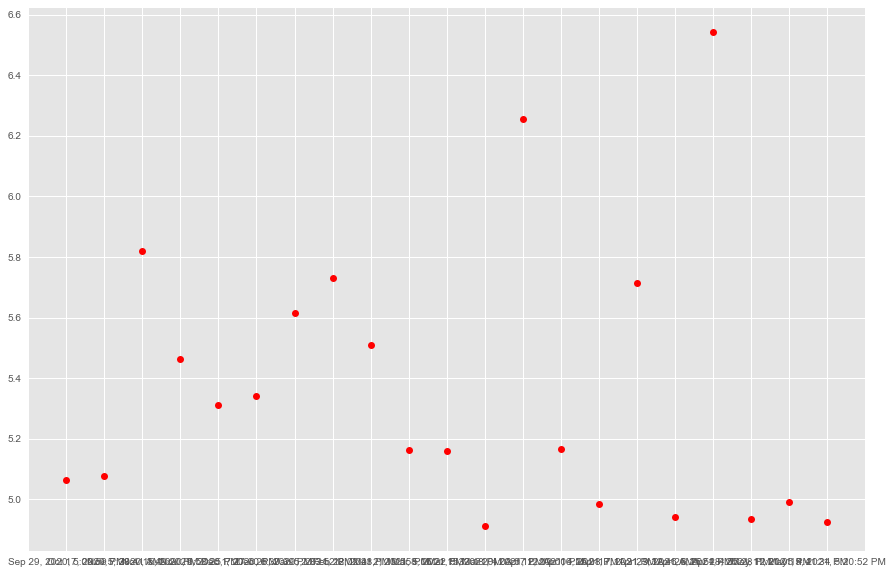

In [111]:
plt.figure(figsize=(15,10))
plt.style.use("ggplot")
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
#plt.gcf().autofmt_xdate()
plt.plot_date(dates,min_per_km,marker="o",color="red",lw=0)
plt.show()


Since I'm currently to lazy to figure out how to plot the dates correctly distances in terms of a time in the above plot, I shift my focus to exploring other plots: 

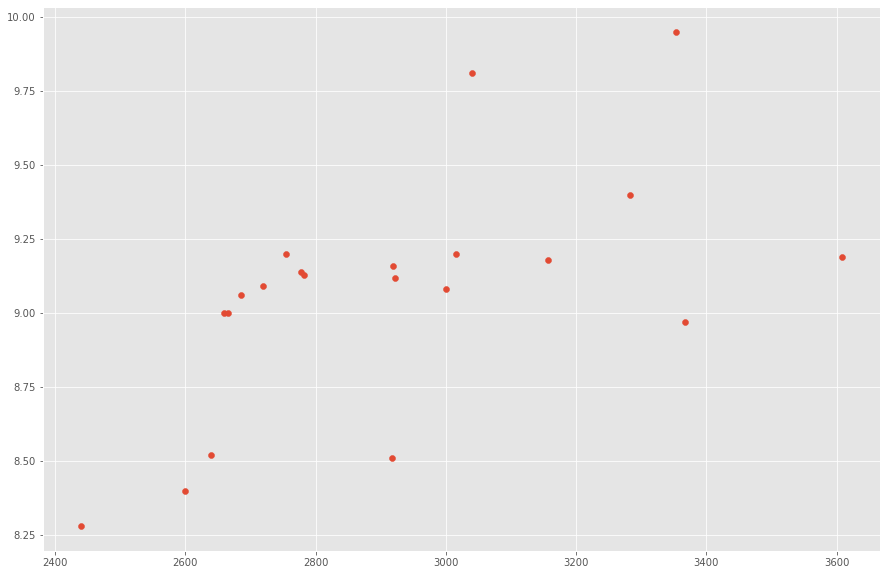

In [18]:
plt.figure(figsize=(15,10))
plt.scatter(time,length)
plt.style.use("ggplot")
plt.show() 

Testing a heatmap plot. This is a premium Strava function, but why pay when we can use the gpxplotter library.

In [20]:
the_map = create_folium_map(titles='openstreetmap')
for track in read_gpx_file('activities/4129227513.gpx'):
    for i,segment in enumerate(track['segments']):
        add_segment_to_map(the_map,segment,color_by='velocity-level',cmap='RdPu_09',line_options={'weight':8})


In [21]:
the_map